<a href="https://colab.research.google.com/github/rashidmeras/EVA-M6/blob/master/EVA_S4_Assignment1_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVA (M6) Session4 Assignment: Proposal2

Objective:

> Using the network defined in *Proposal1* explore different techniques and reduce the total number of parameters such that it is not more than 20K and the validation accuracy is above 99.2%.



*So lets Start!!*

Install the keras API library

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


From Keras API library following APIs are needed to create a DNN:

* The sequential API allows to create models layer-by-layer
* The Flatten API flattens the input. Does not affect the batch size.
* The Convolution2D API creates a convolution kernel that is convolved with the layer input.
* The np_utils API is used to convert a class vector (integers) to binary class matrix.
* Finally import the MNSIT dataset from Keras

MNIST has a training set of 60,000 examples, and a test set of 10,000 examples.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist


Load the the data, shuffled and split between train and test sets.

>The MNIST dataset consists of pair, “handwritten digit image” and “label”. Digit ranges from 0 to 9, meaning 10 patterns in total.

* handwritten digit image (X_train): This is gray scale image with size 28 x 28 pixel.
* label (y_train): This is actual digit number this handwritten digit image represents. It is the numbers between including 0 to 9.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Matplotlib is a Python 2D plotting library & PyPlot is a shell-like interface to Matplotlib

Display the data in X_train[0] array

(60000, 28, 28)


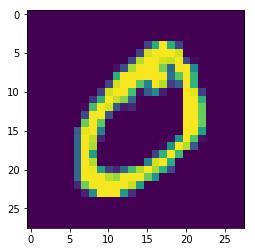

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

Flatten 28x28 images to a 28*28=784 vector for each image.

> The images in the dataset are of 28*28 dimensions which is difficult to accommodate in a simple multilayer neural network. Therefore we need to convert the images into a single dimension where each image contains 784-pixel data using the reshape() function.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The pixel values in the images are in the range of 0 - 255 and in this step we reduce this range even further and normalize it between 0 and 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

label : This is actual digit number this handwritten digit image represents. It is the numbers between including 0 to 9.

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert class vectors to binary class matrices:

> As we can see from above, the output of y_train is an integer from 0 to 9. We need to perform one-hot encoding of the class labels for getting a vector of class integers into a binary matrix. We need to do this to do a “binarization” of the category and so that we can include it as a feature to train the neural network.

We can use the built in np_utils.to_categorical() helper function in keras to do this.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Print the Y_train array after binarization

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##Network Type3

![Proposed Network Archtecture](https://rashidmeras.github.io/images/eva/S4_Proposal2_Fig1.png)

Compared to the *Proposal1* network architecteure, following are the changes proposed here in Network Type3:

> 1. The network architecture is basically the same except that the number of layers are reduced. In this proposed network architecture we stop at Receptive Field of 7x7.
> 2. The channel size are reduced and now the largest channel size is 32 and the smallest channel size is 12


**Why stop at 7x7?**

1. Only the central pixels are going to convolved hence there in no much information that network learns by going beyond 7x7
2. Going beyond 7x7 data being transferred is reduced to very small section and won't be able to infer useful information

Let's fix a random seed=**990** for reproducibility!

In [0]:
# fix random seed for reproducibility
seed = 990
np.random.seed(seed)

**Network Type 3:**

Using the architecture that we have defined above, the new network is implement as shown below.

In [11]:
from keras.layers import Activation
model = Sequential()
 
#Layer1: i/p:|28x28x1|Conv(3x3x1)x32| o/p:|26x26x32|
model.add(Convolution2D(32, 3, 3, activation='relu', use_bias=False, input_shape=(28,28,1)))

#Layer2: i/p:|26x26x32|Conv(3x3x32)x16| o/p:|24x24x16|
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))

#Layer3: i/p:|24x24x16|Conv(3x3x16)x16| o/p:|22x22x16|
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))

#Layer4: i/p:|22x22x16|Conv(1x1x16)x12| o/p:|22x22x12|
model.add(Convolution2D(12, 1, 1, activation='relu', use_bias=False))

#Layer5: Max-Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer6: i/p:|11x11x16|Conv(3x3x16)x16| o/p:|9x9x16|
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))

#Layer7: i/p:|9x9x16|Conv(3x3x16)x16| o/p:|7x7x16|
model.add(Convolution2D(16, 3, 3, activation='relu', use_bias=False))

#Layer8: i/p:|7x7x16|Conv(7x7x16)x10| o/p:|1x1x10|
model.add(Convolution2D(10, 7, 7, use_bias=False))

#Layer9: Flatten & activation
model.add(Flatten())
model.add(Activation('softmax'))

#Print model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        288       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4608      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2304      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 12)        192       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 12)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          1728      
_________________________________________________________________
conv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarn

Compile the model based on following:

* Optimization method: Here we use 'adam'
* Kind of loss this method will optimize: Here we use 'categorical_crossentropy'

Start training the model:

* Batch size: set to 128
* Epoch: set to 30
* Print validation accuracy at each epoch

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, validation_data=(X_test, Y_test), verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.2635 - acc: 0.9210 - val_loss: 0.0615 - val_acc: 0.9819
Epoch 2/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.0698 - acc: 0.9789 - val_loss: 0.0459 - val_acc: 0.9861
Epoch 3/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.0503 - acc: 0.9850 - val_loss: 0.0418 - val_acc: 0.9866
Epoch 4/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.0431 - acc: 0.9867 - val_loss: 0.0371 - val_acc: 0.9887
Epoch 5/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.0375 - acc: 0.9881 - val_loss: 0.0393 - val_acc: 0.9885
Epoch 6/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.0331 - acc: 0.9900 - val_loss: 0.0372 - val_acc: 0.9881
Epoch 7/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.0282 - acc: 0.9910 - val_loss: 0.0282 - val_ac

Result:
* Total params: **19,264**
* Trainable params: 19,264
* Non-trainable params: 0

>* Score (validation accuracy): **99.19%** at 17th epoch

Analysis:
> The total number of parameters is **19264** (under 20K) and the validation accuracy is **99.19%** 

###Summary:

In this section we introduced Network Type3 that has the followiing updates from it's predecessor:
1. Reduced channel sizes
2. Reduced total layers i.e last layer at 7x7

The total epoch updated to 30 and we also added validation_data during model fit which helped us to see the vaildation accuracy at each epoch.

Hence in ***Proposal2*** we have updated the previous network discussed in Proposal1 and named it as **Network Type3** this can be further improvised with new techniques to increase the validation accuracy.

###Thank you!